In [1]:
import pandas as pd
dataset = pd.read_csv('ipl.csv')
X = dataset.iloc[:,[7,8,9,12,13]].values #Input features
y = dataset.iloc[:, 14].values #Label

In [2]:
X

array([[1.00e+00, 0.00e+00, 1.00e-01, 0.00e+00, 0.00e+00],
       [1.00e+00, 0.00e+00, 2.00e-01, 0.00e+00, 0.00e+00],
       [2.00e+00, 0.00e+00, 2.00e-01, 0.00e+00, 0.00e+00],
       ...,
       [1.28e+02, 7.00e+00, 1.94e+01, 4.70e+01, 1.20e+01],
       [1.29e+02, 7.00e+00, 1.95e+01, 4.70e+01, 1.30e+01],
       [1.29e+02, 8.00e+00, 1.96e+01, 4.70e+01, 1.30e+01]])

In [3]:
y

array([222, 222, 222, ..., 129, 129, 129], dtype=int64)

**Features Used:**

* runs
* wickets
* overs
* striker
* non-striker


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

We will train our model on 75 percent of the dataset and test the model on remaining dataset.

## Feature Scaling the data

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the dataset
Linear Regression Algorithm

In [6]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(X_train,y_train)

LinearRegression()

Random Forest Regression Algorithm

In [7]:
from sklearn.ensemble import RandomForestRegressor
lin = RandomForestRegressor(n_estimators=100,max_features=None)
lin.fit(X_train,y_train)

RandomForestRegressor(max_features=None)

## Training

In [8]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [9]:
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100
print("R-squared value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,10))

R-squared value: 67.30142678112203
Custom accuracy: 65.30204167543675


## Testing

In [10]:
import numpy as np
new_prediction = lin.predict(sc.transform(np.array([[140,5,10,50,50]]))) #[runs, wickets, overs,  striker, nstriker]
print("Prediction score between:" , int(new_prediction - 3),"To",int(new_prediction + 3))

Prediction score between: 207 To 213


C:\Users\Asus\AppData\Local\Temp\ipykernel_29256\1945328436.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Prediction score between:" , int(new_prediction - 3),"To",int(new_prediction + 3))


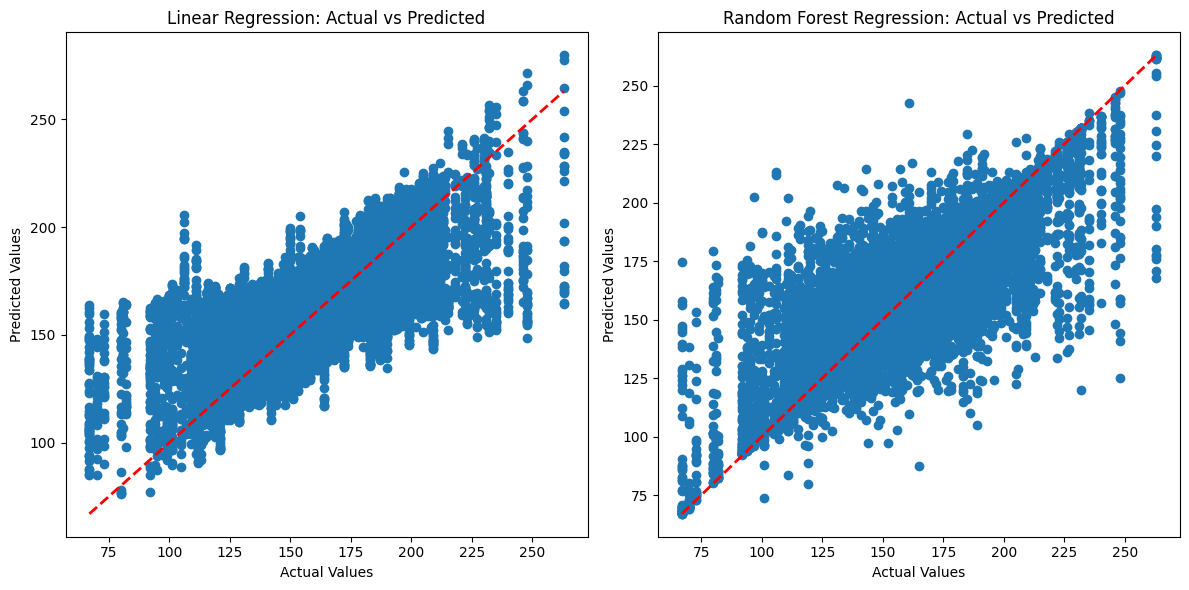

In [11]:
import matplotlib.pyplot as plt

# Linear Regression
lin_reg_pred = linr.predict(X_test)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, lin_reg_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Random Forest Regression
random_forest_reg_pred = lin.predict(X_test)

plt.subplot(1, 2, 2)
plt.scatter(y_test, random_forest_reg_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Random Forest Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Assuming 'dataset' is your pandas DataFrame containing the relevant data
X = dataset[['runs', 'wickets', 'overs', 'striker', 'non-striker']]
y = dataset['total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to present the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance table
print(feature_importance_df)


       Feature  Importance
0         runs    0.323016
3      striker    0.259197
2        overs    0.160975
1      wickets    0.151858
4  non-striker    0.104954


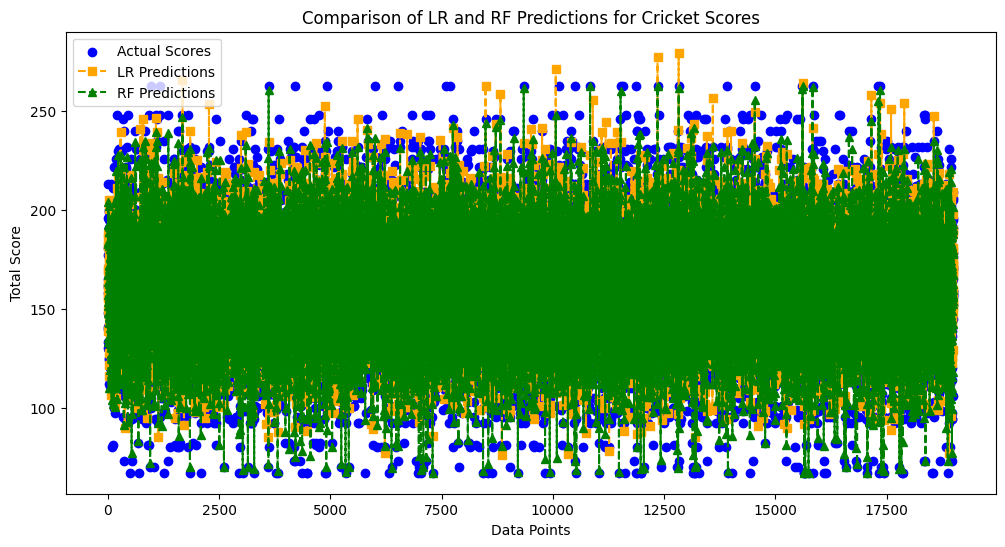

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'dataset' is your pandas DataFrame containing the relevant data
X = dataset[['runs', 'wickets', 'overs', 'striker', 'non-striker']]
y = dataset['total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Standardize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Plotting the predictions with unique markers and colors
plt.figure(figsize=(12, 6))

plt.scatter(np.arange(len(y_test)), y_test, label='Actual Scores', marker='o', color='blue')
plt.plot(np.arange(len(y_test)), lr_predictions, label='LR Predictions', linestyle='--', marker='s', color='orange')
plt.plot(np.arange(len(y_test)), rf_predictions, label='RF Predictions', linestyle='--', marker='^', color='green')

plt.xlabel('Data Points')
plt.ylabel('Total Score')
plt.title('Comparison of LR and RF Predictions for Cricket Scores')
plt.legend()
plt.show()
